In [2]:
import pickle
import yaml
from pathlib import Path
import os

import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [15]:
def saveFig(name, fig):
    fig.savefig(
        name,
        dpi=None,
        facecolor=fig.get_facecolor(),
        edgecolor="none",
        orientation="portrait",
        format="png",
        transparent=False,
        bbox_inches="tight",
        pad_inches=0.2,
        metadata=None,
    )

In [32]:
# Update the path belows to the directories containing the results for FedPFT and FedAvg
path_fedpft_resutls_cifar100 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','16-36-16')
path_fedpft_resutls_caltech101 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','16-44-20')

path_fedavg_resutls_cifar100 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','18-16-41')
path_fedavg_resutls_caltech101 = os.path.join(os.path.realpath('..'),'outputs','2024-04-14','16-36-16')


In [28]:
# load results
def read_accuracies(path_to_pickle):
    for result in list(Path(path_to_pickle).glob("*.pkl")):
        with open(result, "rb") as handle:
            data = pickle.load(handle)

        accuracies = data['history'].metrics_distributed['accuracy']
        return accuracies


In [33]:
fedpft_cifar = read_accuracies(path_fedpft_resutls_cifar100)
fedpft_caltech = read_accuracies(path_fedpft_resutls_caltech101)
fedavg_cifar = read_accuracies(path_fedavg_resutls_cifar100)
fedavg_caltech = read_accuracies(path_fedavg_resutls_caltech101)


In [2]:
fedavg_cifar = [(1, 0.06924765515865097),
 (2, 0.1315106765116743),
 (3, 0.16773099181800039),
 (4, 0.1946717222111355),
 (5, 0.2171223308720814),
 (6, 0.2375773298742766),
 (7, 0.2597285970864099),
 (8, 0.276092596288166),
 (9, 0.290560766314109),
 (10, 0.3036320095789264),
 (11, 0.3128118140091798),
 (12, 0.3261823987228098),
 (13, 0.33745759329475156),
 (14, 0.3477349830373179),
 (15, 0.35831171422869684),
 (16, 0.36679305527838757),
 (17, 0.37407703053282776),
 (18, 0.3817601277190182),
 (19, 0.38824585910995807),
 (20, 0.3942326880862103)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


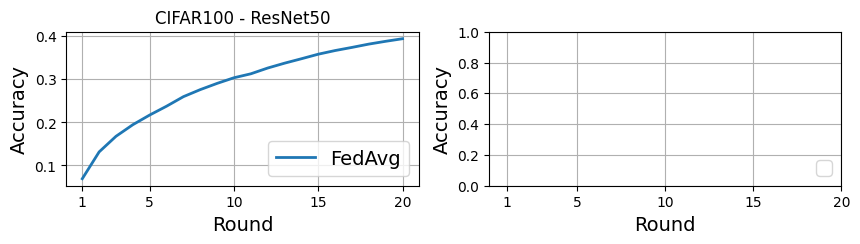

In [59]:
def viz():
    fig, axs = plt.subplots(figsize=(10, 2), nrows=1, ncols=2)
    
    # cifar100 - fedavg
    axs[0].plot([r for r, _ in fedavg_cifar], [a for _, a in fedavg_cifar], label='FedAvg', linewidth=2.0)
    
    axs[0].set_title('CIFAR100 - ResNet50')
    
    for ax in axs:
        ax.set_xticks([1, 5, 10 , 15, 20])
        ax.grid()
        ax.legend(fontsize=14, loc='lower right')
        ax.set_xlabel("Round", fontsize=14)
        ax.set_ylabel("Accuracy", fontsize=14)

    return fig

f = viz()


In [20]:
saveFig("FedProx_mnist.png", f)